In [78]:
import numpy as np
from numpy import array
from numpy.linalg import inv
from numpy.linalg import pinv
import matplotlib.pyplot as plt

In [79]:
Duration25 = array([
    [90, 1.5, 2.55],
    [89, 1.5, 2.04],
    [94, 1.5, 2.04],
    [ 95, 1, 1.275], 
    [ 90, 1, 0.9],
])
X, y = Duration25[:, 0:2], Duration25[:, 2]
print(X)

[[90.   1.5]
 [89.   1.5]
 [94.   1.5]
 [95.   1. ]
 [90.   1. ]]


In [80]:
import pandas as pd
df = pd.DataFrame(X, columns = ['Pressure', 'Valve'])
df['Speed'] = pd.Series(y)
df

,Pressure,Valve,Speed
0,90.0,1.5,2.550
1,89.0,1.5,2.040
2,94.0,1.5,2.040
3,95.0,1.0,1.275
4,90.0,1.0,0.900


In [81]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Speed ~ Pressure + Valve', data = df)
results_formula = model.fit()
results_formula.params

Intercept   -2.698113
Pressure     0.016132
Valve        2.293396
dtype: float64

In [82]:
x_surf, y_surf = np.meshgrid(np.linspace(df.Pressure.min(), df.Pressure.max(), 100), np.linspace(df.Valve.min(), df.Valve.max(), 100))
onlyX = pd.DataFrame({'Pressure':x_surf.ravel(), 'Valve':y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

fittedY = np.array(fittedY)
                        


Populating the interactive namespace from numpy and matplotlib


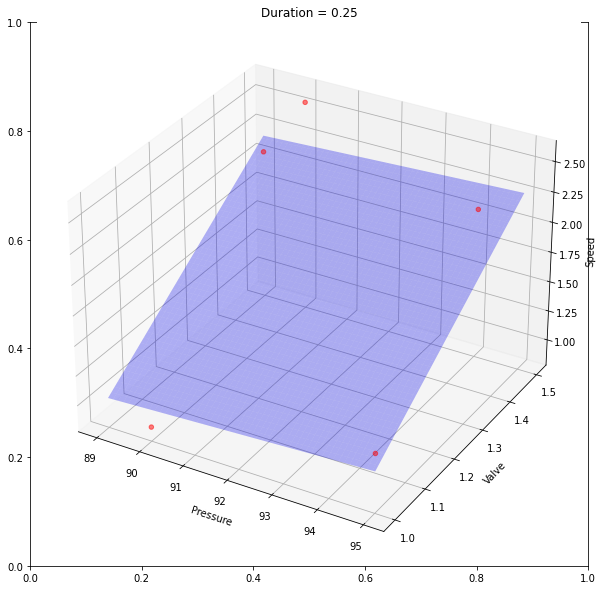

In [83]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)
fig = plt.figure()
plt.title("Duration = 0.25")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Pressure'],df['Valve'],df['Speed'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Pressure')
ax.set_ylabel('Valve')
ax.set_zlabel('Speed')
plt.show()

In [84]:
Duration50 = array([
    [90, 1, 4.5],
    [90, 1.5, 5.25],
    [90, 1.5, 3.5],
    [95, 1.5, 5.25], 
    [95, 1, 3.5],
])
X, y = Duration50[:, 0:2], Duration50[:, 2]
print(X)

[[90.   1. ]
 [90.   1.5]
 [90.   1.5]
 [95.   1.5]
 [95.   1. ]]


In [85]:
import pandas as pd
df = pd.DataFrame(X, columns = ['Pressure', 'Valve'])
df['Speed'] = pd.Series(y)
df

,Pressure,Valve,Speed
0,90.0,1.0,4.50
1,90.0,1.5,5.25
2,90.0,1.5,3.50
3,95.0,1.5,5.25
4,95.0,1.0,3.50


In [86]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Speed ~ Pressure + Valve', data = df)
results_formula = model.fit()
results_formula.params

Intercept    1.321429
Pressure     0.014286
Valve        1.357143
dtype: float64

In [87]:
x_surf, y_surf = np.meshgrid(np.linspace(df.Pressure.min(), df.Pressure.max(), 100), np.linspace(df.Valve.min(), df.Valve.max(), 100))
onlyX = pd.DataFrame({'Pressure':x_surf.ravel(), 'Valve':y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

fittedY = np.array(fittedY)

Populating the interactive namespace from numpy and matplotlib


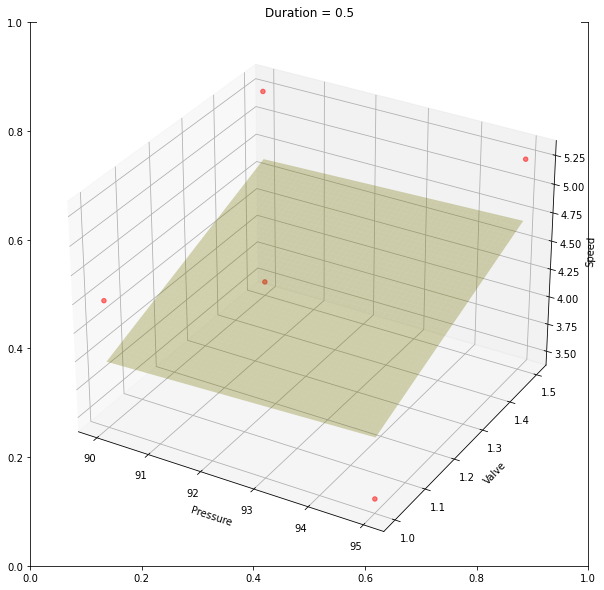

In [88]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)
fig = plt.figure()
plt.title("Duration = 0.5")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Pressure'],df['Valve'],df['Speed'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='olive', alpha=0.3)
ax.set_xlabel('Pressure')
ax.set_ylabel('Valve')
ax.set_zlabel('Speed')
plt.show()